# 2.19 Statistics for Geoscientists class test - 14:00-17:00 27th May 2016

# Test instructions

* This test contains **2** questions each of which should be answered.
* Write your program in a Python cell just under each question.
* You should write an explanation of your solution as comments in your code.
* In each case your solution program must fulfil all of the instructions - please check the instructions carefully and double check that your program fulfils all of the given instructions.
* Save your work regularly.
* At the end of the test you should email your IPython notebook document (i.e. this document) to [Gerard J. Gorman](http://www.imperial.ac.uk/people/g.gorman) at g.gorman@imperial.ac.uk

## Question 1
Download **LOLA Lunar Crater Data**, [LolaLargeLunarCraterCatalog.csv](https://raw.githubusercontent.com/ggorman/Introduction-to-stats-for-geoscientists/gh-pages/data/LolaLargeLunarCraterCatalog.csv), and the **MESSENGER and Mariner 10 data**, [MercLargeCraters.csv](https://raw.githubusercontent.com/ggorman/Introduction-to-stats-for-geoscientists/gh-pages/data/MercLargeCraters.csv).
*  What is the median crater diameter for each dataset?
* Plot histograms for both of these datasets.
* Determine if these two samples come from the same distribution. Justify your choice of test. 

Lola data headers are: ('lon', 'lat', 'diam_km')
Merc data headers are: ('lone', 'lat', 'diam_km')
Lola data median is: 35.5957541837
Merc data median is: 35.997798285


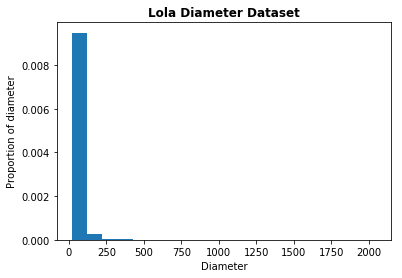

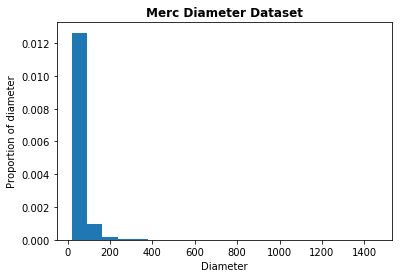

H0: The datasets are normally distributed?
p-values =  0.0 0.0
Reject the hypothesis that the sample comes from a normal distribution.

H0: The datasets from the same distribution?
p-value = 0.3042407636276471
Accept the hypothesis that the samples comes from the same distribution.


In [29]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

#First let import the data from the two files
# ../data/LolaLargeLunarCraterCatalog.csv
# ../data/MercLargeCraters.csv

# Let take a look at the data - we need to know what kind of data we are dealing with
#%cat ../data/LolaLargeLunarCraterCatalog.csv
#%cat ../data/MercLargeCraters.csv

# Read the csv in using recfromcsv, note that setting the dtype stop the unicode deprecated message,
# but students should not be penilised for having a deprecated message. They will need to set a dtype to read the
# unicode strings now or later. Other methods to read the file could be used here.
record_lola = np.recfromcsv("../data/LolaLargeLunarCraterCatalog.csv",dtype=([float,float,float]))
record_merc = np.recfromcsv("../data/MercLargeCraters.csv",dtype=([float,float,float]))

# Print out the headers - no marks for this but we need to know the headers to read the data. This will show we have the same
# headers for both datasets.
print ("Lola data headers are: {}".format(record_lola.dtype.names))
print ("Merc data headers are: {}".format(record_merc.dtype.names))

#Let place the data in numpy arrays
lola_data = np.array(record_lola["diam_km"])
merc_data = np.array(record_merc["diam_km"])

# Double check data is in the arrays
#print(lola_data)
#print(merc_data)

# Now lets calculate the median for each dataset
print ("Lola data median is: {}".format(np.median(lola_data)))
print ("Merc data median is: {}".format(np.median(merc_data)))

#Now lets plot a histogram for the first dataaset
n, bins, patches = plt.hist(lola_data, 20, normed=1)

# Add axis lables
plt.xlabel("Diameter")
plt.ylabel("Proportion of diameter")

# Add plot title
plt.title("Lola Diameter Dataset",weight='bold')

# Show plot
plt.show()

#Now lets plot a histogram for the second dataaset
n, bins, patches = plt.hist(merc_data, 20, normed=1)

# Add axis lables
plt.xlabel("Diameter")
plt.ylabel("Proportion of diameter")

# Add plot title
plt.title("Merc Diameter Dataset",weight='bold')

# Show plot
plt.show()

# Now we test if the distributrions are the same. So first lets check if the data is normally distributed...
# the histograms don't look like it, but better to check.
k2_1, p_1 = stats.normaltest(lola_data)
k2_2, p_2 = stats.normaltest(merc_data)

print ("H0: The datasets are normally distributed?")
print ("p-values = ", p_1, p_2)
if p_1 <= 0.05 or p_2 <= 0.05:
    print ("Reject the hypothesis that the sample comes from a normal distribution.\n")
else:
    print ("Accept the hypothesis that the sample comes from a normal distribution.\n")
    
# We now know for certain that the dataset are not normally distributed, so we can select an appropriate test
# We have the option of a Mann Witney U, K-S, or Chi-Squared Test. Because we want to test populations and 
# whether the two dataset belong to each other we should employ the K-S test.

d, p = stats.ks_2samp(lola_data, merc_data)

print ("H0: The datasets from the same distribution?")
print ("p-value = {}".format(p))
if p <= 0.05:
    print ("Reject the hypothesis that the samples comes from the same distribution.")
else:
    print ("Accept the hypothesis that the samples comes from the same distribution.")

## Question 2
Pike (1974) found empirical relationships between crater depth and diameter based on 171 small craters less than 15km in diameter. Elachi (1976) also plotted his small crater depths to their diameters, finding that for his small sample of craters less than 30km in diameter, the ratio of the crater depth was also a constant.

The file [crater_depth.csv](https://raw.githubusercontent.com/ggorman/Introduction-to-stats-for-geoscientists/gh-pages/data/crater_depth.csv) contains crater diameter and depth data for a sample of small craters.

* Create a scatter plot of depth vs diameter. 
* Use linear regression to fit a line through the data.
* What is the significance of the r-value and p-value in this case.

Crater data headers are: ('diameter_km', 'depth_km')


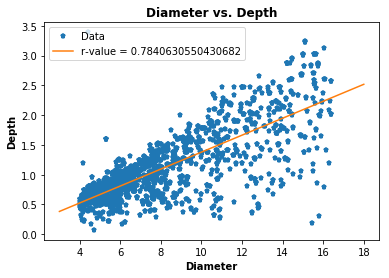

p-value = 0.0; r-value = 0.7840630550430682
The significance of the r-value and p-value:
-- A p-value of 0.0 means we can reject the HO that the r-value is due to chance.
----The results are therefore statistically significant.
-- A r-value of 0.7840630550430682 means the is a strong positve corralation.


In [48]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

#First let import the data from the two files
# ../data/crater_depth.csv

# Let take a look at the data - we need to know what kind of data we are dealing with
#%cat ../data/crater_depth.csv 

# Read the csv in using recfromcsv, note that setting the dtype stop the unicode deprecated message,
# but students should not be penilised for having a deprecated message. They will need to set a dtype to read the
# unicode strings now or later. Other methods to read the file could be used here.
record = np.recfromcsv("../data/crater_depth.csv",dtype=([float,float]))

# Print out the headers - no marks for this but we need to know the headers to read the data. This will show we have the same
# headers for both datasets.
print ("Crater data headers are: {}".format(record.dtype.names))

#Let place the data in numpy arrays
dia_data = np.array(record["diameter_km"])
depth_data = np.array(record["depth_km"])

#Plot a scatter plot showing temperature against pressure
plt.plot(dia_data, depth_data, '*', markersize=5, markeredgewidth=2, zorder=2)

# Label the axis with some thing sensible
plt.ylabel("Depth",weight='bold')
plt.xlabel("Diameter",weight='bold')

# Titles
plt.title("Diameter vs. Depth",weight='bold')

# Workout lin regression and r-value
slope, intercept, r_value, p_value, std_err = stats.linregress(dia_data, depth_data)
x = np.array([3, 18])
y = slope*x+intercept
plt.plot(x,y)

# Add legend showing r-value
plt.legend(["Data","r-value = {}".format(r_value)])

# Show the plot
plt.show()

# Write a statement on the significance of the r-value and p-value.
print ("p-value = {}; r-value = {}".format(p_value,r_value))
print ("The significance of the r-value and p-value:")

print ("-- A p-value of {} means we can reject the HO that the r-value is due to chance.\n----The results are therefore statistically significant.".format(p_value))
print ("-- A r-value of {} means the is a strong positve corralation.".format(r_value))